# QUBO solved Dwave in ising model

https://arxiv.org/ftp/arxiv/papers/1811/1811.11538.pdf

For a Minimum Vertex Cover (MVC) problem on a weighted graph $ G_w = (V_w,E) $ with $ V_w $ weighted vertices, $ E $ edges, where one also wishes to maximize the weights of the selected nodes and respect a size constraint, the QUBO formulation can be structured as follows:

1. **Variables:** For each node $ i $, a binary variable $ x_i $ is defined, where $ x_i = 1 $ if node $ i $ is selected in the cover, and 0 otherwise.
2. **Coverage Constraint:** Each edge must be covered by at least one of the nodes it connects (MVC).
3. **Node Weights:** Each node $ i $ has a weight $ w_i $.
4. **Size Constraint:** Impose a maximum size $ k $ on the number of selected nodes.

The QUBO objective function can be expressed as minimize :

$ f(x) = - \sum_{i=1}^V w_i x_i + A \sum_{(i, j) \in E} (1 - x_i)(1 - x_j) + B \left( \sum_{i=1}^V x_i - k \right)^2 $

For a linear graph of 3 nodes (1 ----- 2 ----- 3) the QUBO matrix would be: 

|          | $ x_1 $                               | $ x_2 $                                | $ x_3 $                                |
|----------|---------------------------------------|----------------------------------------|----------------------------------------|
| $ x_1 $  | $ - w_1 - A + B(1 - 2k) $             | $ A + 2B$                              | $2B$                                   |
| $ x_2 $  | $  A + 2B$                            | $ - w_2 - 2A + B(1 - 2k) $             | $ A + 2B$                              |
| $ x_3 $  | $2B$                                  | $ A + 2B$                              | $ - w_3 - A + B(1 - 2k) $              |

The values of $ A $ and $ B $ must be carefully chosen to balance the maximization of the weights of the nodes, the coverage of each edge, and the size constraint of the MVC.


### Remplacement de $ x_i $ par $ \frac{1}{2}(1 - z_i) $ (model d'Ising)

$ f(z) = - \sum_{i=1}^V w_i \frac{1}{2}(1 - z_i) + A \sum_{(i, j) \in E} \left( \frac{1}{2}(1 + z_i) \right)\left( \frac{1}{2}(1 + z_j) \right) + B \left( \sum_{i=1}^V \frac{1}{2}(1 - z_i) - k \right)^2 $

### Terme de Poids
$ - \sum_{i=1}^V w_i \frac{1}{2}(1 - z_i) = - \frac{1}{2} \sum_{i=1}^V w_i + \frac{1}{2} \sum_{i=1}^V w_i z_i $

For a linear graph of 3 nodes (1 ----- 2 ----- 3) :

$ = - \frac{1}{2} [w_1 + w_2 + w_3] + \frac{1}{2} [w_1z_1 + w_2z_2 + w_3z_3] $

### Contrainte de Couverture
$  A \sum_{(i, j) \in E} \left( \frac{1}{4}(1 + z_i)(1 + z_j) \right) = \frac{A}{4} \sum_{(i, j) \in E} (1 + z_i + z_j + z_i z_j) $

For a linear graph of 3 nodes (1 ----- 2 ----- 3) :

$ A \left[ \left( \frac{1}{2}(1 + z_1) \right)\left( \frac{1}{2}(1 + z_2) \right) + \left( \frac{1}{2}(1 + z_2) \right)\left( \frac{1}{2}(1 + z_3) \right) \right] $

$ = \frac{A}{4} [(1 + z_1)(1 + z_2) + (1 + z_2)(1 + z_3)] $

$ = \frac{A}{4} [1 + z_1 + z_2 + z_1z_2 + 1 + z_2 + z_3 + z_2z_3] $

$ = \frac{A}{4} [2 + z_1 + 2z_2 + z_3 + z_1z_2 + z_2z_3] $

### Contrainte de Taille


$  B \left( \frac{1}{2} \sum_{i=1}^V (1 - z_i) - k \right)^2 $

For a linear graph of 3 nodes (1 ----- 2 ----- 3) :

$ B \left( \frac{3}{2} - \frac{1}{2}(z_1 + z_2 + z_3) - k \right)^2 $

$ = B \left( k^2 + kz_1 + kz_2 + kz_3 - 3k + \frac{1}{4}z_1^2 + \frac{1}{2}z_1z_2 + \frac{1}{2}z_1z_3 - \frac{3}{2}z_1 + \frac{1}{4}z_2^2 + \frac{1}{2}z_2z_3 - \frac{3}{2}z_2 + \frac{1}{4}z_3^2 - \frac{3}{2}z_3 + \frac{9}{4} \right) $

$ = B \left(k^2 - 3k + \frac{9}{4} + \frac{1}{4}(z_1^2 + z_2^2 + z_3^2)\right) 
+B\left((k- \frac{3}{2}) (z_1+z_2+z_3)\right) 
+\frac{B}{2}\left(z_1z_2 + z_1z_3 + z_2z_3  \right) $


Dans le développement de la contrainte de taille, les termes quadratiques $ z_i^2 $ apparaissent avec un coefficient de $ \frac{B}{4} $. Cependant, puisque $z_i $ est une variable binaire (pouvant prendre les valeurs -1 ou 1), $ z_i^2 $ sera toujours égal à 1. Par conséquent, ces termes quadratiques deviennent des termes constants dans la fonction objectif, n'affectant pas la structure de la matrice au meme titre que $ k^2 - 3k + \frac{9}{4} $. De même pour -$\frac{1}{2} [w_1 + w_2 + w_3]$ dans le terme de poids et $\frac{A}{4} * 2$ dans la contrainte de couverture.


### Matrice ISING for a linear graph of 3 nodes (1 ----- 2 ----- 3)

|      | $ z_1 $                                                  | $ z_2 $                                 | $ z_3 $                                              |
|------|----------------------------------------------------------|-----------------------------------------|------------------------------------------------------|
| $ z_1 $ | $ \frac{1}{2}w_1 + \frac{A}{4} + B(k - \frac{3}{2}) $ | $ \frac{A}{4} + \frac{B}{2}$            | $\frac{B}{2}$                                        |
| $ z_2 $ | $ \frac{A}{4} + \frac{B}{2}$                    | $ \frac{1}{2}w_2 + \frac{A}{2} + B(k - \frac{3}{2}) $ |       $ \frac{A}{4} + \frac{B}{2}$           |
| $ z_3 $ | $ \frac{B}{2}$                                        | $ \frac{A}{4} + \frac{B}{2}$            | $\frac{1}{2}w_3 + \frac{A}{4} + B(k - \frac{3}{2}) $ |




In [49]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy

from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.cloud import Client
from dimod import qubo_to_ising

In [50]:

def create_qubo_matrix(graph, A, B, k):
    """
    Create a 2D QUBO matrix for the weighted MVC problem with a size constraint on a given graph.

    :param graph: NetworkX graph
    :param A: Coefficient for the edge coverage penalty
    :param B: Coefficient for the size constraint penalty
    :param k: Size constraint (number of vertices to be included in the vertex cover)
    :return: QUBO matrix as a 2D numpy array
    """
    n = len(graph)
    Q = np.zeros((n, n))

    for i in range(n):
        # Weight constrainte
        Q[i][i] -= graph.nodes[i]['weight']
        # Size constrainte (diag)
        Q[i][i] += B * (1 - 2 * k)  
        for j in range(i + 1, n):
            # Size constrainte (off-diag)
            Q[i][j] += 2 * B
            Q[j][i] += 2 * B
            if graph.has_edge(i, j):
                # MVC consctrainte (diag)
                Q[i][i] -= A
                Q[j][j] -= A
                # MVC consctrainte (off-diag)
                Q[i][j] += A
                Q[j][i] += A


    return Q

def create_ising_matrix(graph, A, B, k):
    """
    Create a 2D Ising matrix for the weighted MVC problem with a size constraint on a given graph.

    :param graph: NetworkX graph
    :param A: Coefficient for the edge coverage penalty
    :param B: Coefficient for the size constraint penalty
    :param k: Size constraint (number of vertices to be included in the vertex cover)
    :return: QUBO matrix as a 2D numpy array
    """
    n = len(graph)
    Q = np.zeros((n, n))

    for i in range(n):
        # Weight constrainte
        Q[i][i] += 0.5 * graph.nodes[i]['weight']
        # Size constrainte (diag)
        Q[i][i] += B * (k - 3/2)  
        for j in range(i + 1, n):
            # Size constrainte (off-diag)
            Q[i][j] += 0.5 * B
            Q[j][i] += 0.5 * B
            if graph.has_edge(i, j):
                # MVC consctrainte (diag)
                Q[i][i] += A/4
                Q[j][j] += A/4
                # MVC consctrainte (off-diag)
                Q[i][j] += A/4
                Q[j][i] += A/4


    return Q

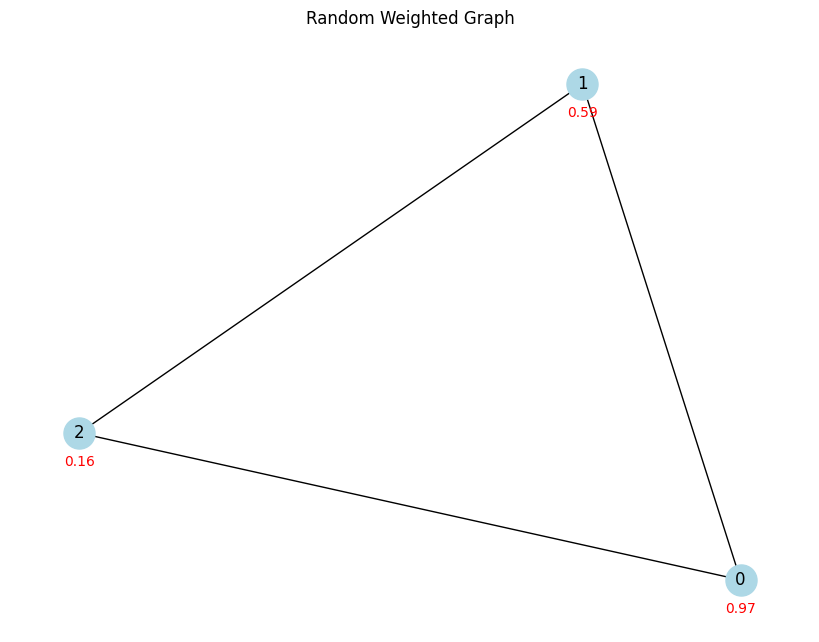

In [51]:
# Example usage
n = 3  # Number of nodes
A = 1  # Edge coverage penalty coefficient
B = 0.5  # Size constraint penalty coefficient
k = 3  # Size constraint

# Create a random weighted graph
G = nx.Graph()
G.add_nodes_from(range(n))
for i in range(n):
    for j in range(i + 1, n):
        if random.random() < 1:  # Randomly decide whether to add an edge
            G.add_edge(i, j)
    #G.nodes[i]['weight'] = random.uniform(0, 1)  # Assign random weights to the nodes
    G.nodes[i]['weight'] = 1 

# Create the QUBO matrix as a 2D numpy array
QUBO = create_qubo_matrix(G, A, B, k)
# Create the ising matrix as a 2D numpy array
ISING = create_ising_matrix(G, A, B, k)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
labels = nx.get_node_attributes(G, 'weight')
for node, label in labels.items():
    x, y = pos[node]
    plt.text(x, y-0.1, f'{label:.2f}', horizontalalignment='center', verticalalignment='center', color='red')

plt.title("Random Weighted Graph")
plt.show()


In [52]:
v,w = scipy.linalg.eigh(QUBO)
print(w[0])

[ 0.8094913  -0.23230568 -0.53921971]


D-WAVE resolution

s'enregistrer : https://cloud.dwavesys.com/leap/

penser a mettre dans le bashrc :

export DWAVE_API_TOKEN='DEV-3c2720060b258ccc9221669519ef5f1d0eb3fa09'

mettre son propre token
penser a relancer le terminal apres avoir enregistrer le bashrc

In [53]:
# transformation en dictionaire pour utiliser ocean
dic_QUBO = {}
for i in range(len(QUBO)):
    for j in range(len(QUBO[i])):
        dic_QUBO[(i, j)] = QUBO[i][j]

In [54]:
#creation du model d'ising (avec des zi = 1 ou -1 et non des xi = 0 ou 1)
h, J, offset = qubo_to_ising(dic_QUBO)  #h = diag      J = off-diag    offset = est un décalage constant pour l'énergie (?)

In [55]:
QUBO

array([[-5.46611371,  2.        ,  2.        ],
       [ 2.        , -5.08527806,  2.        ],
       [ 2.        ,  2.        , -4.65798156]])

In [56]:
v,w = scipy.linalg.eigh(QUBO)
print(w[0])

[ 0.8094913  -0.23230568 -0.53921971]


In [57]:
ISING

array([[1.73305686, 0.5       , 0.5       ],
       [0.5       , 1.54263903, 0.5       ],
       [0.5       , 0.5       , 1.32899078]])

In [58]:
v,w = scipy.linalg.eigh(ISING)
print(w[0])

[-0.20658924  0.72922117 -0.65234758]


In [61]:
# Taille de la matrice basée sur la diagonale
taille = len(h)

# Création d'une matrice de zéros
matrice = np.zeros((taille, taille))

# Remplissage de la diagonale
for i in range(taille):
    matrice[i, i] = h[i]

# Remplissage des termes hors diagonaux
for (i, j), valeur in J.items():
    matrice[i, j] = valeur

print(matrice)

v,w = scipy.linalg.eigh(matrice)
print(w[0])

[[-0.73305686  0.5         0.5       ]
 [ 0.5        -0.54263903  0.5       ]
 [ 0.5         0.5        -0.32899078]]
[ 0.83143123 -0.23916319 -0.50152077]


In [60]:
#resoud le probleme
#sampler = EmbeddingComposite(DWaveSampler())  # Remplacer par SimulatedAnnealingSampler() pour un simulateur
#response = sampler.sample_ising(h, J)

#for sample in response.samples():  
    #print(sample)